# BOSQUES ALEATORIOS
Definición: Es un algoritmo de aprendizaje supervisado que, como ya se puede ver en su nombre, crea un bosque y lo hace de alguna manera aleatorio. Para decirlo en palabras simples: el bosque aleatorio crea múltiples arboles de decisión y los combina para obtener una predicción más precisa y estable. En general, mientras más árboles en el bosque se vean, más robusto es el bosque. 

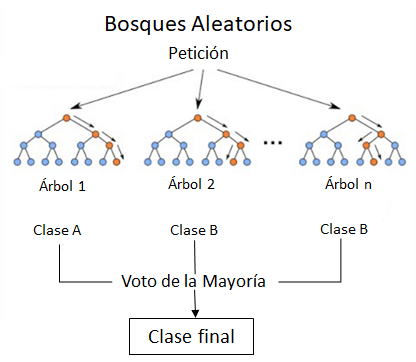

## Se dividen en
###  Clasificación
Los valores de los conjuntos que se desean reproducir han ser categorías. Siendo uno de los casos más habituales diferencias únicamente entre dos posibles categorías: verdadero o falso. Al igual que en los problemas de regresión es necesario identificar las variables independientes, la fórmula y los parámetros con los que se predecirá la variable dependiente. Solo que en este caso la variable dependiente es discreta.
### Regresión
Los valores de los conjuntos que se desean reproducir han de tener un valor continuo. Siendo este el valor que se desea reproducir. Para ello se seleccionan las características con las que se realizarán las predicciones. A las que se denominan variables independientes. Una vez realizado esto se ha de definir una fórmula matemática y calcular los parámetros de modo que al introducir las características se obtenga el valor deseado. Esta se conoce como variable dependiente.

## Funcionamiento
* Crea un bosque y lo hace de alguna manera aleatorio
* Crea múltiples arboles de decisión y los combina para obtener una predicción más precisa y estable
* Al crecer los árboles busca la mejor característica entre un subconjunto aleatorio de características
* Se puede hacer que los arboles sean más aleatorios, usando umbrales aleatorios para cada función

## Diferencia entre los árboles de decisión y los bosques

### Árboles
* Formula un conjunto de reglas a las características de entrenamiento que se utilizaran para hacer las predicciones. 
* Los árboles de decisión son muy profundos pueden sufrir de sobreajuste

### Bosques
* Selecciona al azar las observaciones y características para construir varios árboles de decisión y luego promedia los resultados. 
* Evitan el exceso de adaptación la mayor parte de tiempo, creando subconjuntos aleatorios de características 

# DataSet
El siguiente DataSet nos da los datos acerca de la calidad del vino, esto se calcula dependiendo de las características que el vino tenga y la calificación que este tiene



# Importando Librerías Necesarias
* Pandas: proporciona herramientas de análisis y manipulación de datos de alto rendimiento utilizando sus potentes estructuras de datos
* Numpy: le agrega mayor soporte para vectores y matrices, constituyendo una biblioteca de funciones matemáticas de alto nivel para operar con esos vectores o matrices.
* Random: Se utiliza para obtener un número aleatorio.
Las funciones que están definidas se pueden encontrar en los archivos externos subidos en el repositorio


In [1]:
import pandas as pd
import numpy as np

import random
from pprint import pprint
%matplotlib inline


from funciones_arbol import algoritmo_arbol, prediccion_arbol_decision
from funciones_apoyo import entrenamiento_prueba_split, calcular_precision

# Preparando los Datos 
Al preparar los datos se debe decidir qué hacer cuando en un data set algunos de estos campos estén vacíos o no estén de acuerdo al formato de la columna o fila. Tenemos que hacer una limpieza de los datos teniendo los siguientes puntos a considerar: 
* En el primer caso, si los descartamos, lo más probable es que nos obligue a descartar de la información que tenemos, otras variables que sí necesitamos para nuestro análisis y para las cuales tenemos datos.
* En el segundo, debemos elegir la mejor forma para “rellenar” dichos datos ausentes. 

Así mismo se debe realizar una limpieza de datos.

### Preparación y limpieza
En muchas ocasiones, puede que necesitemos abordar, ordenar y limpiar nuestro dataset. Todo depende del origen de los datos, y de su calidad. Este concepto de ordenar no se refiere a ordenar de mayor a menor las filas de una tabla (que probablemente para el análisis posterior será irrelevante). Nos referimos a ordenar la información de manera que tengamos lo que necesitamos en el formato requerido, y eliminemos lo que nos sobre


In [2]:
df_vino = pd.read_csv('../data/winequality-red.csv')
df_vino['label'] = df_vino.quality
df_vino = df_vino.drop('quality', axis=1)

column_names = []
for column in df_vino.columns:
    name = column.replace(' ',"_")
    column_names.append(name)
df_vino.columns = column_names

In [3]:
df_vino.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Transformando los datos

In [4]:
def transformar_label(valor):
    if valor <= 5:
        return 'malo'
    else:
        return 'bueno'
df_vino['label'] = df_vino.label.apply(transformar_label)

df_vino.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,malo
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,malo
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,malo
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bueno
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,malo


#### Despues de tranformar los datos podemos visualizar los vinos que son de buena o mala calidad

bueno    0.534709
malo     0.465291
Name: label, dtype: float64

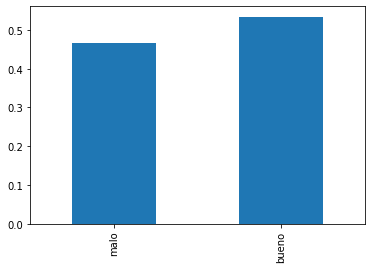

In [5]:
calidad_vino = df_vino.label.value_counts(normalize=True)
calidad_vino[['malo','bueno']].plot(kind='bar')
calidad_vino

In [6]:
random.seed(0)
df_entrenamiento, df_prueba = entrenamiento_prueba_split(df_vino, tamanio_prueba=0.2)
df_prueba

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,label
788,10.0,0.560,0.24,2.2,0.079,19.0,58.0,0.99910,3.18,0.56,10.1,bueno
1552,6.3,0.680,0.01,3.7,0.103,32.0,54.0,0.99586,3.51,0.66,11.3,bueno
861,5.8,1.010,0.66,2.0,0.039,15.0,88.0,0.99357,3.66,0.60,11.5,bueno
82,7.4,0.500,0.47,2.0,0.086,21.0,73.0,0.99700,3.36,0.57,9.1,malo
530,9.1,0.220,0.24,2.1,0.078,1.0,28.0,0.99900,3.41,0.87,10.3,bueno
...,...,...,...,...,...,...,...,...,...,...,...,...
562,9.0,0.540,0.49,2.9,0.094,41.0,110.0,0.99820,3.08,0.61,9.2,malo
927,8.4,0.670,0.19,2.2,0.093,11.0,75.0,0.99736,3.20,0.59,9.2,malo
525,10.4,0.640,0.24,2.8,0.105,29.0,53.0,0.99980,3.24,0.67,9.9,malo
273,8.4,0.715,0.20,2.4,0.076,10.0,38.0,0.99735,3.31,0.64,9.4,malo


# Algoritmo de Bosque Aleatorio
Se puede observar en las siguientes funciones se declara lo que es el algoritmo de para la creación de los arboles con sus respectivas predicciones y los datos ya seleccionados aleatoriamente para los arbol

## Bootstrapping

Esta funcion se encarga de segmentar el dataframe de entrenamiento en dataframes mas pequeños y con registros aleatorios.

In [7]:
def bootstrapping(df_entrenamiento, n_bootstrap):
    bootstrap_indices = np.random.randint(low=0, high=len(df_entrenamiento), size=n_bootstrap)
    df_bootstrapped = df_entrenamiento.iloc[bootstrap_indices]
    
    return df_bootstrapped

## Funcion para generar el bosque

Con la siguiente funcion vamos a generar el bosque aleatorio. De tal forma que los dataframes creados anteriormente tengan su propio arbol.

In [8]:
def algoritmo_bosque_aleatorio(df_entrenamiento, n_arboles, n_bootstraps, n_caracteristicas, ad_max_profundidad):
    bosque = []
    for i in range(n_arboles):
        df_bootstrapped = bootstrapping(df_entrenamiento, n_bootstraps)
        arbol = algoritmo_arbol(df_bootstrapped, max_profundidad=ad_max_profundidad, random_subespacio=n_caracteristicas)
        bosque.append(arbol)
    return bosque

## Funcion para generar las predicciones

La siguiente funcion retornara las predicciones calculadas con los datos de prueba.

In [9]:
def predicciones_bosque_aleatorio(df_prueba, bosque):
    df_predicciones = {}
    for i in range(len(bosque)):
        columna_nombre = 'arbol_{}'.format(i)
        predicciones = prediccion_arbol_decision(df_prueba, arbol = bosque[i])
        df_predicciones[columna_nombre] = predicciones
        df_predicciones = pd.DataFrame(df_predicciones)
        predicciones_bosque_aleatorio = df_predicciones.mode(axis=1)[0]
    return predicciones_bosque_aleatorio, df_predicciones

# Probando el Algoritmo

## Generamos el Bosque Aleatorio

In [10]:
bosque = algoritmo_bosque_aleatorio(df_entrenamiento, n_arboles=10, n_bootstraps=800, n_caracteristicas=4, ad_max_profundidad=4)


## Verificamos las predicciones obtenidas

In [11]:
predicciones, df_predicciones = predicciones_bosque_aleatorio(df_prueba, bosque)
df_predicciones

,arbol_0,arbol_1,arbol_2,arbol_3,arbol_4,arbol_5,arbol_6,arbol_7,arbol_8,arbol_9
788,malo,bueno,bueno,bueno,malo,bueno,bueno,bueno,malo,malo
1552,malo,bueno,malo,bueno,bueno,bueno,bueno,bueno,bueno,bueno
861,bueno,malo,bueno,bueno,bueno,malo,bueno,bueno,malo,bueno
82,malo,malo,malo,bueno,malo,malo,malo,malo,bueno,malo
530,bueno,bueno,bueno,bueno,bueno,bueno,bueno,bueno,bueno,bueno
...,...,...,...,...,...,...,...,...,...,...
562,malo,malo,malo,malo,malo,malo,malo,malo,malo,malo
927,malo,malo,malo,bueno,bueno,malo,malo,malo,malo,malo
525,bueno,bueno,bueno,bueno,bueno,bueno,malo,bueno,malo,malo
273,malo,malo,malo,bueno,bueno,malo,malo,malo,malo,malo


## Verificamos la moda de las predicciones obtenidas en cada arbol

In [12]:
predicciones

788     bueno
1552    bueno
861     bueno
82       malo
530     bueno
        ...  
562      malo
927      malo
525     bueno
273      malo
1338     malo
Name: 0, Length: 320, dtype: object

## Comprobamos la precision de nuetro bosque aleatorio

In [13]:
precision = calcular_precision(predicciones, df_prueba.label)
print (f'El bosque tiene una precision de {precision * 100} %') 

El bosque tiene una precision de 75.0 %


## Comprobamos que datos fueron acertados en nuestro dataframe de prueba

In [14]:
df_prueba['bosque_predict'] = predicciones
df_prueba

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,label,bosque_predict
788,10.0,0.560,0.24,2.2,0.079,19.0,58.0,0.99910,3.18,0.56,10.1,bueno,bueno
1552,6.3,0.680,0.01,3.7,0.103,32.0,54.0,0.99586,3.51,0.66,11.3,bueno,bueno
861,5.8,1.010,0.66,2.0,0.039,15.0,88.0,0.99357,3.66,0.60,11.5,bueno,bueno
82,7.4,0.500,0.47,2.0,0.086,21.0,73.0,0.99700,3.36,0.57,9.1,malo,malo
530,9.1,0.220,0.24,2.1,0.078,1.0,28.0,0.99900,3.41,0.87,10.3,bueno,bueno
...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,9.0,0.540,0.49,2.9,0.094,41.0,110.0,0.99820,3.08,0.61,9.2,malo,malo
927,8.4,0.670,0.19,2.2,0.093,11.0,75.0,0.99736,3.20,0.59,9.2,malo,malo
525,10.4,0.640,0.24,2.8,0.105,29.0,53.0,0.99980,3.24,0.67,9.9,malo,bueno
273,8.4,0.715,0.20,2.4,0.076,10.0,38.0,0.99735,3.31,0.64,9.4,malo,malo


## Comprobando la precision con un solo arbol

In [15]:
bosque2 = algoritmo_bosque_aleatorio(df_entrenamiento, n_arboles=1, n_bootstraps=len(df_entrenamiento), n_caracteristicas=99, ad_max_profundidad=4)
predicciones, df_predicciones = predicciones_bosque_aleatorio(df_prueba, bosque2)
precision = calcular_precision(predicciones, df_prueba.label)
print (f'El arbol tiene una precision de {precision * 100} %') 

El arbol tiene una precision de 71.25 %


## Comprobamos la estructura de cualquier arbol

In [16]:
pprint(bosque[0])

{'volatile_acidity <= 0.55': [{'sulphates <= 0.65': [{'chlorides <= 0.073': ['bueno',
                                                                             {'alcohol <= 11.2': ['malo',
                                                                                                  'bueno']}]},
                                                     {'total_sulfur_dioxide <= 101.0': ['bueno',
                                                                                        {'pH <= 2.93': ['bueno',
                                                                                                        'malo']}]}]},
                              {'alcohol <= 10.3': [{'fixed_acidity <= 9.9': ['malo',
                                                                             {'chlorides <= 0.08': ['malo',
                                                                                                    'bueno']}]},
                                                   {'fixed_acid

# Random Forest con Sklearn

In [17]:
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import metrics

from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

In [18]:
X = df_vino.drop('label', axis = 1).values
y = df_vino.values[:,-1]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [20]:
clf = RandomForestClassifier(criterion='entropy', n_estimators=10, max_depth=4)
clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)
precision = metrics.accuracy_score (y_test, y_predict)

# definimios los atributos y la columna de clasificacion 
# para mostrarlos en el arbol
columnas = df_vino.columns[:-1]
clases = np.unique(df_vino.values[:,-1])
print(f'La precision de nuestro bosque aleatorio es de: {precision*100} %')

La precision de nuestro bosque aleatorio es de: 78.4375 %


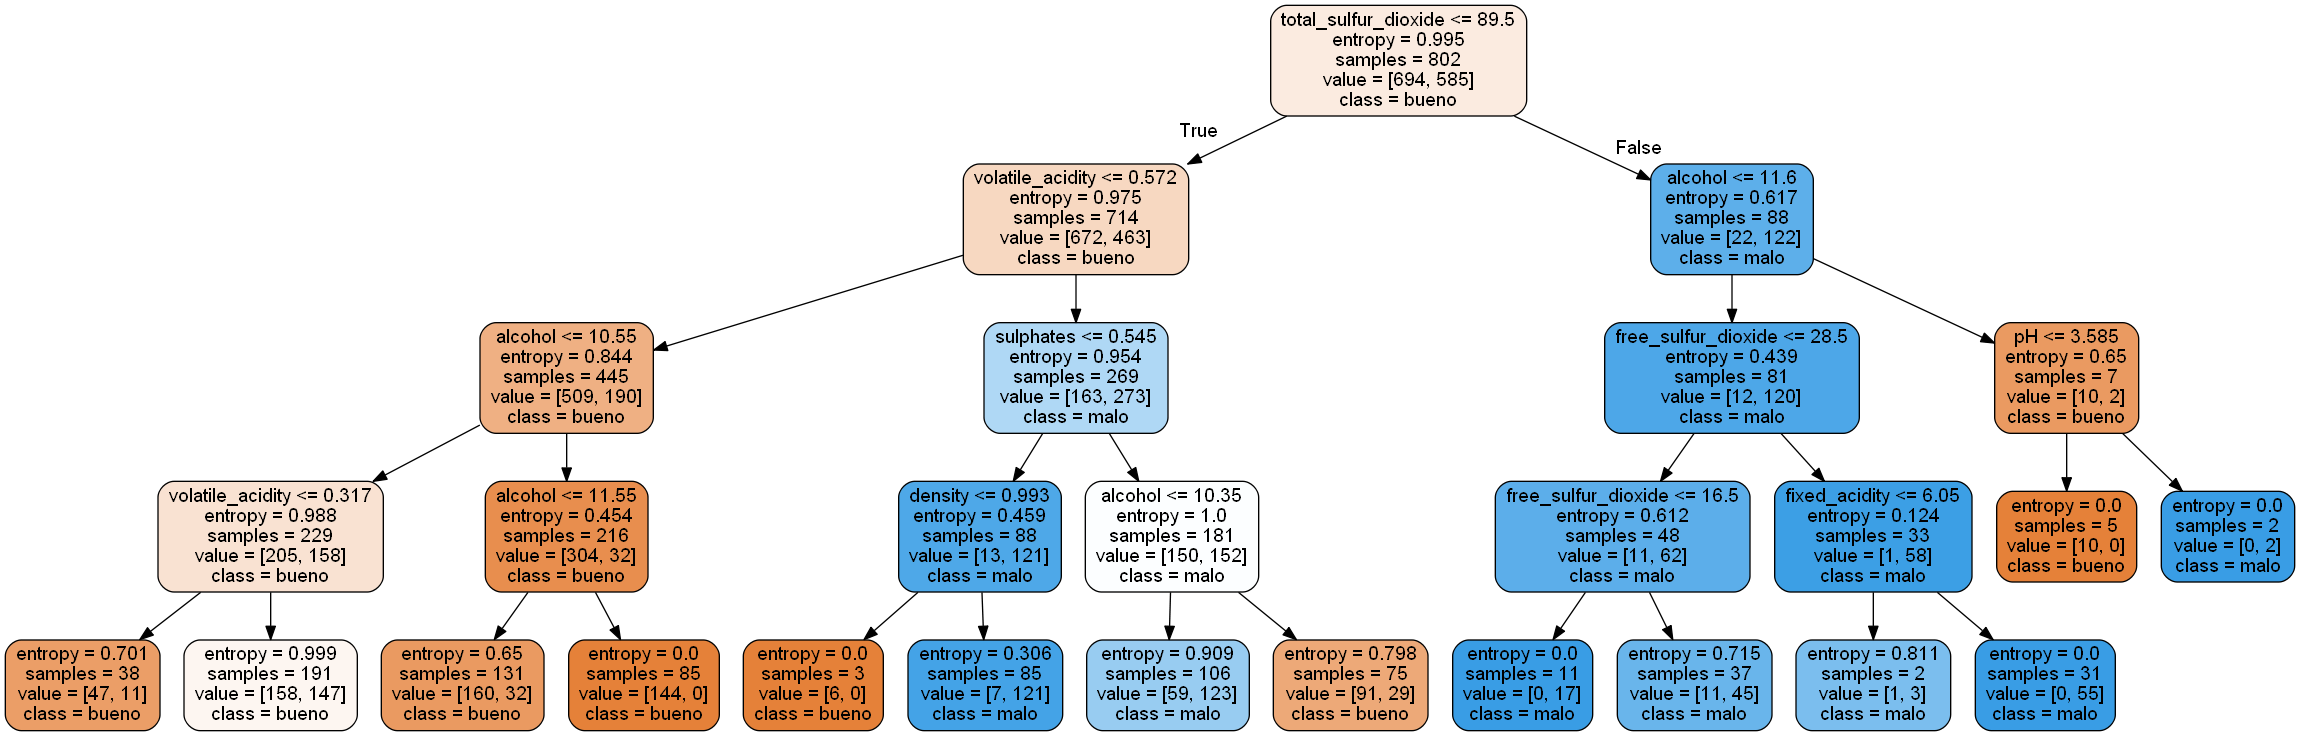

In [21]:
with open(r"wine-tree.dot",'w') as f:
    f = tree.export_graphviz(clf.estimators_[1], out_file=f, feature_names=columnas, class_names=clases, impurity=True, rounded=True, filled=True)
    
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
check_call(['dot','-Tpng',r'wine-tree.dot','-o',r'wine-tree.png'])
PImage("wine-tree.png")